# Bonn Fernandez - 42101212
----------------------------------------------------------------------------------
# **Milestone 2 (Task 2 & Onwards) --- *Task 1 is located in milestone 1 file***

In [18]:
import seaborn as sns
import sys 
sys.path.append('..')
from scripts import project_functions as pf
raw_data = "../../data/raw/listings.csv"
df = pf.load_and_process(raw_data) 
#df = load_and_process(raw_data)
display(df)
        

Name        Room Type  \
0                        D1 -  Million Dollar View 2 BR  Entire home/apt   
1     Monthly (or Longer ) Designer One Bedroom Down...  Entire home/apt   
2                          Vancouver's best kept secret  Entire home/apt   
3                                     EcoLoft Vancouver  Entire home/apt   
4           Close to PNE/Hastings Park and East Village  Entire home/apt   
...                                                 ...              ...   
3456   convenient and safe location near Killarney area  Entire home/apt   
3457    ❤️DT+Parking🌈AmazingView⭐️+Transit+Stadium=ForU  Entire home/apt   
3458        Stunning Gastown Loft in Vancouver Downtown  Entire home/apt   
3459  Central 1 BR suite in the heart of Cambie Village  Entire home/apt   
3460  Large Townhouse Bedroom close to Airport&Skytrain     Private room   

      Days of Stay  Price per Night ($) # of tenants  Total Reviews  \
0               90                150.0            4             16   
1               30                 85.0            1            430   
2               30                145.0            1             88   
3                3                140.0            3             33   
4                3                195.0            3              5   
...            ...                  ...          ...            ...   
3456             7                 58.0            1              2   
3457             1                140.0            2              1   
3458             2                117.0            1              2   
3459             2                 85.0            2              1   
3460             1                 75.0            1              2   

      Experience Rating  Cleanliness Rating  Checkin Rating  \
0                   9.3                 9.0            10.0   
1                   9.3                10.0             9.0   
2                   9.8                10.0            10.0   
3                   9.5                 9.0            10.0   
4                   9.6                10.0            10.0   
...                 ...                 ...             ...   
3456                8.0                10.0             8.0   
3457               10.0                10.0            10.0   
3458               10.0                10.0            10.0   
3459               10.0                10.0            10.0   
3460                9.0                10.0            10.0   

      Communication Rating  Location Rating  Overall Rating  Bayesian Rating  
0                      9.0             10.0            47.3        48.383069  
1                     10.0             10.0            48.3        48.366228  
2                     10.0             10.0            49.8        48.572428  
3                      9.0             10.0            47.5        48.366073  
4                     10.0             10.0            49.6        48.418172  
...                    ...              ...             ...              ...  
3456                   8.0             10.0            44.0        48.395965  
3457                  10.0             10.0            50.0        48.411645  
3458                  10.0             10.0            50.0        48.414037  
3459                  10.0             10.0            50.0        48.411645  
3460                  10.0             10.0            49.0        48.411025  

[3461 rows x 13 columns]

# **Task 3 - Exploratory Data Analysis**

---
### *About the Dataset*
The dataset is a compilation of all Vancouver's Airbnb information. It includes: Ratings, Location, Hosts, Accomodation, Price, Links, and muchmore. 

Although not associated with the Airbnb Co., the organization that compiled this dataset provides up-to-date data and license for public uses.

### *Why I chose this Dataset*

Initially, I was simply interested in ranking the most affordable yet best airbnb to stay in Vancouver. As someone who likes to travel, aggregating a large pool of airbnbs can be practical in sifting to good ones from the bad. However, as I glanced over the raw dataset I became intrgued as to what other information I can uncover from the pool of random data.

### *Chosen Weighted Score*
I used the bayesian rating method to fairly aggregate ratings based on the number of reviews an airbnb has. 

### *Overview report of the dataset*

In [2]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### *Research Questions*
Now processed data has been summarized by the Report above, the research questions i'll analyze the data with are:
 - Q1) What is the best Airbnb in Vancouver?
 - Q2) What are the top 5 Vancouver Airbnb at different price ranges?
 - Q3) On what category of "Days of stay","Room Type","# of tenants" do the price per night concentrate to
 - Q4) How effective is Bayesian Rating method
 - Q5) Relationship of Total Reviews and Price and what does that say to the budget of people when it comes to choosing an airbnb
---

## **Task 4 - Data Wrangling and Analysis**

### *Step 1) Wrangle the data for each of the research questions*

In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#display(df)
## Dataframe for Question 1
df_q1 = df.filter(['Name','Bayesian Rating']).sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).head(10) #top 10

## Datframe for Question 2
df_q2 = df.filter(['Name','Price per Night ($)','Bayesian Rating'])
top=10
df_q21 = df_q2[df_q2['Price per Night ($)'] < 100].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).reset_index().head(top) # <$100
df_q22 = df_q2[(df_q2['Price per Night ($)'] >= 100)&(df_q2['Price per Night ($)'] <= 200)].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).reset_index().head(top) # $(100-200)
df_q23 = df_q2[(df_q2['Price per Night ($)'] > 200)&(df_q2['Price per Night ($)'] <= 300)].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).reset_index().head(top) # $(200 - 300)
df_q24 = df_q2[(df_q2['Price per Night ($)'] > 300)&(df_q2['Price per Night ($)'] <= 400)].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).reset_index().head(top) # $(300 - 400)
df_q25 = df_q2[(df_q2['Price per Night ($)'] > 400)].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).head(top) # $400+

## Dataframe for Question 3

df_q3 = df.filter(['Name','Days of Stay','Price per Night ($)','Bayesian Rating','# of tenants','Room Type'])
labels_nights = ['day(s)','week(s)','month(s)']
bins_nights = [1,7,29,2000]
df_q3['Length of Stay'] = pd.cut(x=df_q3['Days of Stay'],bins=bins_nights,labels=labels_nights,include_lowest=True)
df_q3

## Dataframe for Question 3

Name  Days of Stay  \
0                        D1 -  Million Dollar View 2 BR            90   
1     Monthly (or Longer ) Designer One Bedroom Down...            30   
2                          Vancouver's best kept secret            30   
3                                     EcoLoft Vancouver             3   
4           Close to PNE/Hastings Park and East Village             3   
...                                                 ...           ...   
3456   convenient and safe location near Killarney area             7   
3457    ❤️DT+Parking🌈AmazingView⭐️+Transit+Stadium=ForU             1   
3458        Stunning Gastown Loft in Vancouver Downtown             2   
3459  Central 1 BR suite in the heart of Cambie Village             2   
3460  Large Townhouse Bedroom close to Airport&Skytrain             1   

      Price per Night ($)  Bayesian Rating # of tenants        Room Type  \
0                   150.0        48.383069            4  Entire home/apt   
1                    85.0        48.366228            1  Entire home/apt   
2                   145.0        48.572428            1  Entire home/apt   
3                   140.0        48.366073            3  Entire home/apt   
4                   195.0        48.418172            3  Entire home/apt   
...                   ...              ...          ...              ...   
3456                 58.0        48.395965            1  Entire home/apt   
3457                140.0        48.411645            2  Entire home/apt   
3458                117.0        48.414037            1  Entire home/apt   
3459                 85.0        48.411645            2  Entire home/apt   
3460                 75.0        48.411025            1     Private room   

     Length of Stay  
0          month(s)  
1          month(s)  
2          month(s)  
3            day(s)  
4            day(s)  
...             ...  
3456         day(s)  
3457         day(s)  
3458         day(s)  
3459         day(s)  
3460         day(s)  

[3461 rows x 7 columns]

### *Step 2) Visualizing the Wrangled datas*

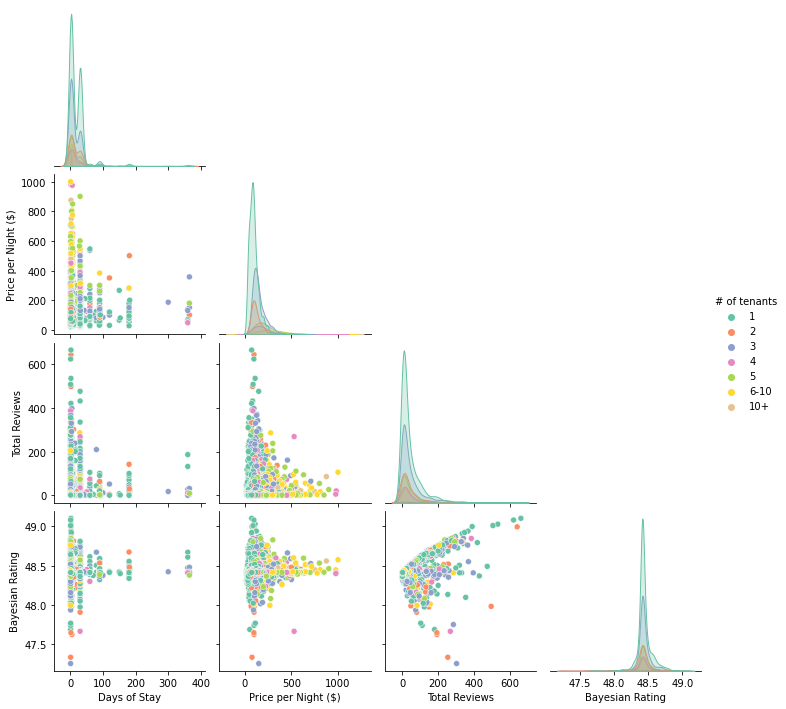

In [511]:
df_new=df.filter(['Days of Stay','Price per Night ($)','# of tenants','Total Reviews','Bayesian Rating','Room Type'])
sns.pairplot(df_new,corner=True,hue='# of tenants',diag_kind='kde',palette='Set2',)

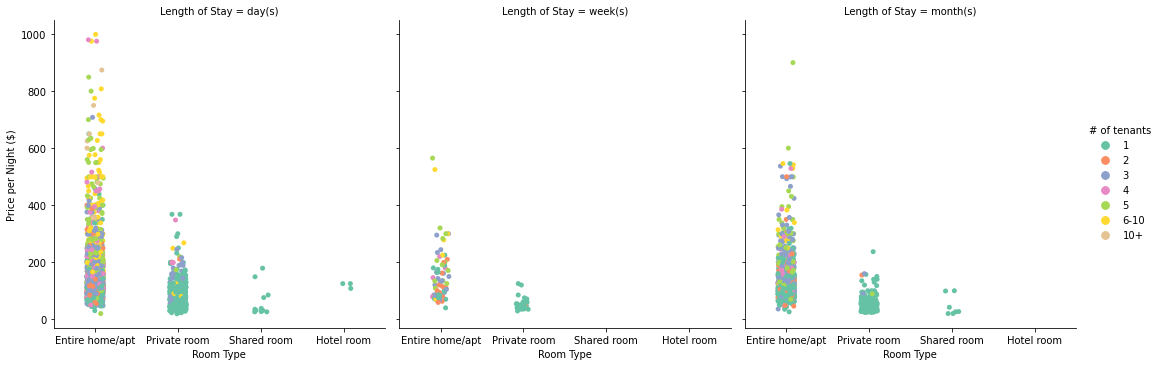

In [504]:
plot = sns.catplot(data=df_q3,y='Price per Night ($)',x='Room Type',hue='# of tenants',col='Length of Stay',sharey=True,palette='Set2')

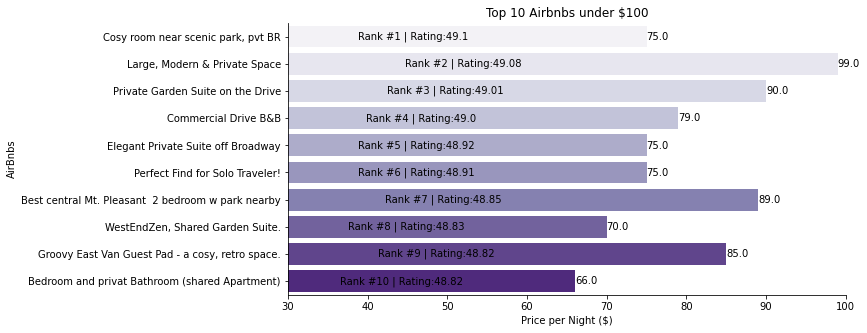

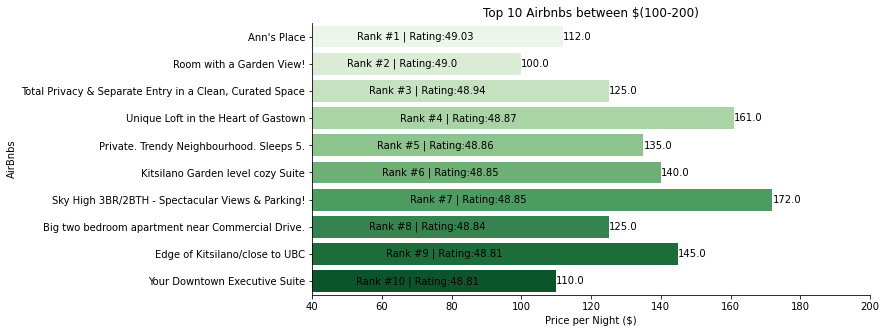

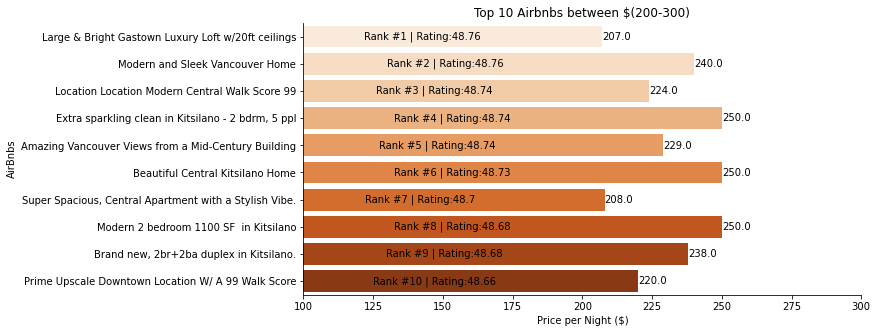

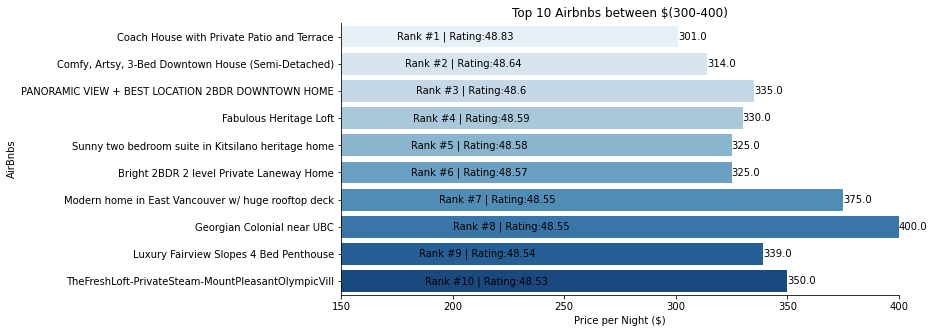

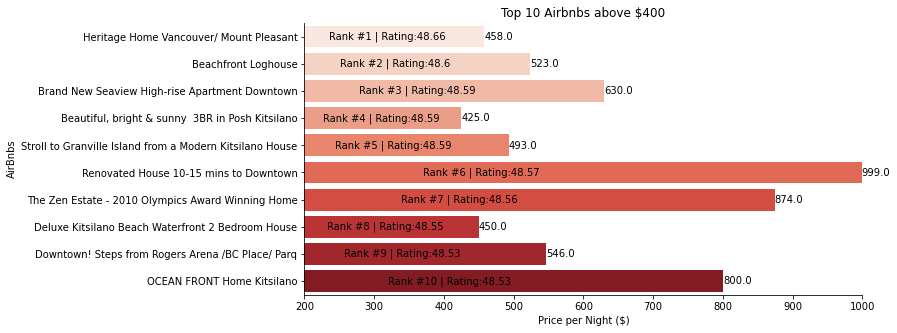

In [428]:
plt.figure(figsize=(10,top*0.5))
plt.xlim((30,100))
plot1 = sns.barplot(data=df_q21,y='Name',x='Price per Night ($)',palette='Purples')
plot1.spines['right'].set_visible(False)
plot1.spines['top'].set_visible(False)
plt.bar_label(plot1.containers[0],labels=df_q21['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot1.patches:
    plot1.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q21['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+20,p.get_y()+0.5)
               )
    i = i+1
plot1.set(title=f"Top {top} Airbnbs under $100", ylabel="AirBnbs")

plt.show()

# --------------------------------------------------
plt.figure(figsize=(10,top*0.5))
plt.xlim((40,200))
plot2 = sns.barplot(data=df_q22,y='Name',x='Price per Night ($)',palette='Greens')
sns.despine()
plt.bar_label(plot2.containers[0],labels=df_q22['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot2.patches:
    plot2.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q22['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+25,p.get_y()+0.5)
               )
    i = i+1
plot2.set(title=f"Top {top} Airbnbs between $(100-200)", ylabel="AirBnbs")
plt.show()
# --------------------------------------------------
plt.figure(figsize=(10,top*0.5))
plt.xlim((100,300))
plot3 = sns.barplot(data=df_q23,y='Name',x='Price per Night ($)',palette='Oranges')
sns.despine()
plt.bar_label(plot3.containers[0],labels=df_q23['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot3.patches:
    plot3.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q23['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+70,p.get_y()+0.5)
               )
    i = i+1
plot3.set(title=f"Top {top} Airbnbs between $(200-300)", ylabel="AirBnbs")
plt.show()
# --------------------------------------------------
plt.figure(figsize=(10,top*0.5))
plt.xlim((150,400))
plot4 = sns.barplot(data=df_q24,y='Name',x='Price per Night ($)',palette='Blues')
sns.despine()
plt.bar_label(plot4.containers[0],labels=df_q24['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot4.patches:
    plot4.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q24['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+100,p.get_y()+0.5)
               )
    i = i+1
plot4.set(title=f"Top {top} Airbnbs between $(300-400)", ylabel="AirBnbs")

plt.show()
# -------------------------------------------------
plt.figure(figsize=(10,top*0.5))
plt.xlim((200,1000))
plot5 = sns.barplot(data=df_q25,y='Name',x='Price per Night ($)',palette='Reds')
sns.despine()
plt.bar_label(plot5.containers[0],labels=df_q25['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot5.patches:
    plot5.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q25['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+120,p.get_y()+0.5)
               )
    i = i+1
plot5.set(title=f"Top {top} Airbnbs above $400", ylabel="AirBnbs")

plt.show()

### *Step 3) Drawing Conclusions For Researh Questions By Analyzing Data*

# ***Save the Processed DATA on the Processed Folder***